## INTRO

This notebook analyzes Olympic data to uncover trends and patterns related to countries’ performance in the Games. Specifically, it focuses on identifying countries that have never won a medal. By leveraging libraries such as pandas and matplotlib, the analysis includes data cleaning, visualization, and insights generation. The goal is to provide a clear understanding of global Olympic achievements and highlight nations that have yet to reach the podium.

In [1]:
!pip3 install pandas matplotlib --upgrade --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sqlite3
%matplotlib inline
plt.rcParams['figure.figsize'] =  (22,5)
plt.rcParams['font.size'] = 14

In [3]:
bios = pd.read_csv('athletes/bios.csv')
bios.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN


### What should we clean up?

- [x] Get rid of bullet points in Used Names
- [x] Split height/weight
- [x] Parse out dates from `Born` & `Died` column
- [x] Parse out city, region, and country from `Born` column
- [ ] Get rid of extra columns
  

In [4]:
df = bios.copy()
df['name'] = df['Used name'].str.replace("•", " ")
df.head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order,name
0,Competed in Olympic Games,Male,"François Joseph Marie Antoine ""Jean-François""•...",Jean-François•Blanchy,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",France,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jean-François Blanchy
1,Competed in Olympic Games,Male,Arnaud Benjamin•Boetsch,Arnaud•Boetsch,"1 April 1969 in Meulan, Yvelines (FRA)",NaN,France,2,183 cm / 76 kg,"Racing Club de France, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN,Arnaud Boetsch
2,Competed in Olympic Games • Administrator,Male,Jean Laurent Robert•Borotra,Jean•Borotra,"13 August 1898 in Biarritz, Pyrénées-Atlantiqu...","17 July 1994 in Arbonne, Pyrénées-Atlantiques ...",France,3,183 cm / 76 kg,"TCP, Paris (FRA)",Le Basque Bondissant (The Bounding Basque),NaN,NaN,NaN,NaN,NaN,Jean Borotra
3,Competed in Olympic Games,Male,Jacques Marie Stanislas Jean•Brugnon,Jacques•Brugnon,"11 May 1895 in Paris VIIIe, Paris (FRA)","20 March 1978 in Monaco, Monaco (MON)",France,4,168 cm / 64 kg,"Sporting club de Paris, Paris (FRA)",Toto,NaN,NaN,NaN,NaN,NaN,Jacques Brugnon
4,Competed in Olympic Games,Male,Henry Albert•Canet,Albert•Canet,"17 April 1878 in Wandsworth, England (GBR)","25 July 1930 in Paris VIIe, Paris (FRA)",France,5,NaN,"TCP, Paris (FRA)",NaN,NaN,NaN,NaN,NaN,NaN,Albert Canet


In [5]:
# Split the Measurements column into height & weight columns
df[['height_cm', 'weight_kg']] = df['Measurements'].str.split('/', expand=True)
# Get rid of " cm" and the " kg" from our new columns
df['height_cm'] = pd.to_numeric(df['height_cm'].str.strip(' cm'), errors='coerce')
df['weight_kg'] = pd.to_numeric(df['weight_kg'].str.strip(' kg'), errors='coerce')

In [6]:
df.sort_values('height_cm', ascending=False).head()

,Roles,Sex,Full name,Used name,Born,Died,NOC,athlete_id,Measurements,Affiliations,Nick/petnames,Title(s),Other names,Nationality,Original name,Name order,name,height_cm,weight_kg
89070,Competed in Olympic Games • Other,Male,Yao•Ming,Yao•Ming,"12 September 1980 in Xuhui District, Shanghai ...",NaN,People's Republic of China,89782,226 cm / 141 kg,"Shanghai Sharks, Shanghai (CHN) / Houston Rock...",NaN,NaN,NaN,NaN,姚•明,Oriental,Yao Ming,226.0,141.0
5781,Competed in Olympic Games,Male,"Thomas Loren ""Tommy""•Burleson",Tommy•Burleson,"24 February 1952 in Crossnore, North Carolina ...",NaN,United States,5804,223 cm / 102 kg,"NC State Wolfpack, Raleigh (USA)",NaN,NaN,NaN,NaN,NaN,NaN,Tommy Burleson,223.0,102.0
6978,Competed in Olympic Games,Male,Arvydas Romas•Sabonis,Arvydas•Sabonis,"19 December 1964 in Kaunas, Kaunas (LTU)",NaN,Lithuania Soviet Union,7013,223 cm / 122 kg,"Žalgiris Kaunas, Kaunas (LTU) / Real Madrid, M...",Sabas,NaN,"Arvidas Romas Sabonis, Арвидас Ромас Сабонис",Lithuania,NaN,NaN,Arvydas Sabonis,223.0,122.0
89075,Competed in Olympic Games,Male,Roberto•Dueñas Hernández,Roberto•Dueñas,"1 November 1975 in Madrid, Madrid (ESP)",NaN,Spain,89787,221 cm / 137 kg,"FC Barcelona, Barcelona (ESP)",NaN,NaN,NaN,NaN,NaN,NaN,Roberto Dueñas,221.0,137.0
120266,Competed in Olympic Games,Male,Zhang•Zhaoxu,Zhang•Zhaoxu,"18 November 1987 in Binzhou, Shandong (CHN)",NaN,People's Republic of China,122147,221 cm / 110 kg,"Shanghai Sharks, Shanghai (CHN)",NaN,NaN,NaN,NaN,张•兆旭,Oriental,Zhang Zhaoxu,221.0,110.0


In [7]:
# Parse out dates from 'Born' and 'Died' columns
date_pattern = r'(\d+ \w+ \d{4}|\d{4})'
df['born_date'] = df['Born'].str.extract(date_pattern)
df['born_year'] = df['Born'].str.extract(r'(\d{4})')

df['born_date'] = pd.to_datetime(df['born_date'], format="mixed", errors='coerce')
df['born_year'] = pd.to_numeric(df['born_year'])

df['died_date'] = df['Died'].str.extract(date_pattern)
df['died_date'] = pd.to_datetime(df['died_date'], format="mixed", errors='coerce')

In [8]:
# Get city, region, and country from Born column
location_pattern = r'in ([\w\s()-]+), ([\w\s-]+) \((\w+)\)'
df['Born'].str.extract(location_pattern)

,0,1,2
0,Bordeaux,Gironde,FRA
1,Meulan,Yvelines,FRA
2,Biarritz,Pyrénées-Atlantiques,FRA
3,Paris VIIIe,Paris,FRA
4,Wandsworth,England,GBR
...,...,...,...
145495,Serov,Sverdlovsk,RUS
145496,Moskva (Moscow),Moskva,RUS
145497,Kotlas,Arkhangelsk,RUS
145498,Niort,Deux-Sèvres,FRA


In [9]:
df[['born_city','born_region','born_country']] = df['Born'].str.extract(location_pattern, expand=True)

In [10]:
pd.set_option('display.max_colwidth', None)
#Distribution of Athletes based on their birth city
length = len(df.value_counts('born_city',ascending=False))
round((df.value_counts('born_city',ascending=False)/length*100),2).head(25)

born_city
Budapest                          6.16
Moskva (Moscow)                   3.95
Oslo                              3.17
Stockholm                         2.81
Praha (Prague)                    2.68
Toronto                           2.59
Wien (Vienna)                     2.45
Buenos Aires                      2.41
København (Copenhagen)            2.34
Sydney                            2.22
Montréal                          2.09
Berlin                            2.09
Ciudad de México (Mexico City)    2.03
Helsinki                          1.96
Rio de Janeiro                    1.94
Amsterdam                         1.92
Barcelona                         1.90
Melbourne                         1.86
New York                          1.86
Seoul                             1.81
São Paulo                         1.76
London                            1.73
Madrid                            1.69
Athina (Athens)                   1.56
Roma                              1.54
Name: count, dt

In [11]:
# Remove any unneccessary columns
df.columns

Index(['Roles', 'Sex', 'Full name', 'Used name', 'Born', 'Died', 'NOC',
       'athlete_id', 'Measurements', 'Affiliations', 'Nick/petnames',
       'Title(s)', 'Other names', 'Nationality', 'Original name', 'Name order',
       'name', 'height_cm', 'weight_kg', 'born_date', 'born_year', 'died_date',
       'born_city', 'born_region', 'born_country'],
      dtype='object')

In [12]:
cols = ['athlete_id', 'name', 'born_date', 'born_city', 'born_region',
                   'born_country', 'NOC', 'height_cm', 'weight_kg', 'died_date']

df_clean = df[cols]

In [13]:
#Saving Clean data as a CSV
df_clean.to_csv('./clean-data/bios.csv', index=False)

## Cleaning results data

In [14]:
results = pd.read_csv('results/results.csv')

/var/folders/ny/pg8v39_s7fs6mzps_lf1v5l80000gn/T/ipykernel_46111/4000160142.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  results = pd.read_csv('results/results.csv')


In [15]:
results.head()

,Games,Event,Team,Pos,Medal,As,athlete_id,NOC,Discipline,Nationality,Unnamed: 7
0,1912 Summer Olympics,"Singles, Men (Olympic)",NaN,=17,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
1,1912 Summer Olympics,"Doubles, Men (Olympic)",Jean Montariol,DNS,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
2,1920 Summer Olympics,"Singles, Men (Olympic)",NaN,=32,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
3,1920 Summer Olympics,"Doubles, Mixed (Olympic)",Jeanne Vaussard,=8,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN
4,1920 Summer Olympics,"Doubles, Men (Olympic)",Jacques Brugnon,4,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN


### Cleaning to-do:
- [x] Split year and type from games
- [x] split out tied column from position
- [x] make non-numeric POSs NAN in Pos
- [x] drop unnamed column
- [x] Reorder columns

In [16]:
results['place'] = results['Pos'].str.extract(r'(\d+)')
results['tied'] = results['Pos'].str.contains("=")

In [17]:
results['medal_new'] = results["Medal"].map({"Bronze": 3, "Silver": 2, "Gold": 1})
results[['year', 'type']] = results['Games'].str.extract(r'(\d{4}) (Summer|Winter)', expand=True)

In [18]:
results.head()

,Games,Event,Team,Pos,Medal,As,athlete_id,NOC,Discipline,Nationality,Unnamed: 7,place,tied,medal_new,year,type
0,1912 Summer Olympics,"Singles, Men (Olympic)",NaN,=17,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,17,True,NaN,1912,Summer
1,1912 Summer Olympics,"Doubles, Men (Olympic)",Jean Montariol,DNS,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,NaN,False,NaN,1912,Summer
2,1920 Summer Olympics,"Singles, Men (Olympic)",NaN,=32,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,32,True,NaN,1920,Summer
3,1920 Summer Olympics,"Doubles, Mixed (Olympic)",Jeanne Vaussard,=8,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,8,True,NaN,1920,Summer
4,1920 Summer Olympics,"Doubles, Men (Olympic)",Jacques Brugnon,4,NaN,Jean-François Blanchy,1,FRA,Tennis,NaN,NaN,4,False,NaN,1920,Summer


In [19]:
results['year'] = pd.to_numeric(results['year'])

In [20]:
results.sort_values('year', ascending=False).head()

,Games,Event,Team,Pos,Medal,As,athlete_id,NOC,Discipline,Nationality,Unnamed: 7,place,tied,medal_new,year,type
308407,2022 Winter Olympics,"Slalom, Women (Olympic)",NaN,24.0,NaN,Charlotta Säfvenberg,148986,NaN,NaN,NaN,NaN,24,False,NaN,2022.0,Winter
274176,2022 Winter Olympics,"Ice Hockey, Men (Olympic)",Latvia,11.0,NaN,Ronalds Ķēniņš,128130,LAT,Ice Hockey (Ice Hockey),NaN,NaN,11,False,NaN,2022.0,Winter
274171,2022 Winter Olympics,"Ice Hockey, Men (Olympic)",Latvia,DNS,NaN,Kristers Gudļevskis,128127,LAT,Ice Hockey (Ice Hockey),NaN,NaN,NaN,False,NaN,2022.0,Winter
274168,2022 Winter Olympics,"Ice Hockey, Men (Olympic)",Latvia,11,NaN,Ralfs Freibergs,128125,LAT,Ice Hockey (Ice Hockey),NaN,NaN,11,False,NaN,2022.0,Winter
274149,2022 Winter Olympics,"Four, Open (Olympic)",Latvia 1,5.0,NaN,Oskars Ķibermanis,128118,LAT,Bobsleigh (Bobsleigh),NaN,NaN,5,False,NaN,2022.0,Winter


In [21]:
columns_to_keep = ['year','type','Discipline', 'Event', 'As', 'athlete_id', 'NOC', 'Team', 'place', 'tied', 'Medal']
results = results[columns_to_keep]
results['place'] = pd.to_numeric(results['place'])
results['tied'] = results['tied'].astype(bool)

In [22]:
results.to_csv('./clean-data/results.csv', index=False)

In [23]:
results.head()

,year,type,Discipline,Event,As,athlete_id,NOC,Team,place,tied,Medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN


In [24]:
df_clean.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaT
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [25]:
#Merging the bios and results data to make one combined table
final = results.merge(df_clean, left_on='athlete_id', right_on='athlete_id')
final = final[[i for i in final.columns if i!='NOC_y']]
final.shape


(308408, 19)

In [26]:
for i in os.listdir('clean-data'):
    df_name = i.split(".")[0]
    globals()[f'{df_name}'] = pd.read_csv('clean-data/' + i ) 

## EDA

In [27]:
#Setup a sqlite3 connection and create a table
conn = sqlite3.connect('olympics.db')
final.to_sql('dataset', conn, if_exists='replace', index=False)

308408

In [28]:
final.head()

,year,type,Discipline,Event,As,athlete_id,NOC_x,Team,place,tied,Medal,name,born_date,born_city,born_region,born_country,height_cm,weight_kg,died_date
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,NaN,NaN,1960-10-02


In [29]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          305807 non-null  float64       
 1   type          305807 non-null  object        
 2   Discipline    308407 non-null  object        
 3   Event         308408 non-null  object        
 4   As            308408 non-null  object        
 5   athlete_id    308408 non-null  int64         
 6   NOC_x         308407 non-null  object        
 7   Team          121714 non-null  object        
 8   place         283193 non-null  float64       
 9   tied          308408 non-null  bool          
 10  Medal         44139 non-null   object        
 11  name          308408 non-null  object        
 12  born_date     305692 non-null  datetime64[ns]
 13  born_city     246890 non-null  object        
 14  born_region   246890 non-null  object        
 15  born_country  246

In [30]:
final.describe()

,year,athlete_id,place,born_date,height_cm,weight_kg,died_date
count,305807.000000,308408.000000,283193.000000,305692,236910.000000,227290.000000,73521
mean,1982.239223,72624.097125,16.102764,1956-12-09 23:59:50.955602240,175.349989,70.554525,1986-03-03 07:41:42.387073216
min,1896.000000,1.000000,1.000000,1828-10-25 00:00:00,127.000000,25.000000,1900-04-23 00:00:00
25%,1964.000000,34412.000000,5.000000,1938-07-18 00:00:00,168.000000,60.000000,1966-01-23 00:00:00
50%,1992.000000,73739.500000,9.000000,1965-04-12 00:00:00,175.000000,70.000000,1990-10-26 00:00:00
75%,2008.000000,107168.000000,20.000000,1981-07-12 00:00:00,183.000000,79.000000,2010-07-27 00:00:00
max,2022.000000,148986.000000,185.000000,2009-01-01 00:00:00,226.000000,198.000000,2023-12-28 00:00:00
std,30.983982,41285.940841,19.322611,NaN,10.450750,14.163273,NaN


**How many medals have been distributed so far**

In [31]:
query = '''
select count(*) as TotalMedals 
from dataset where Medal is not null
'''
pd.read_sql(query, conn)

,TotalMedals
0,44139


**What does the distribution of medals over the years look like?**

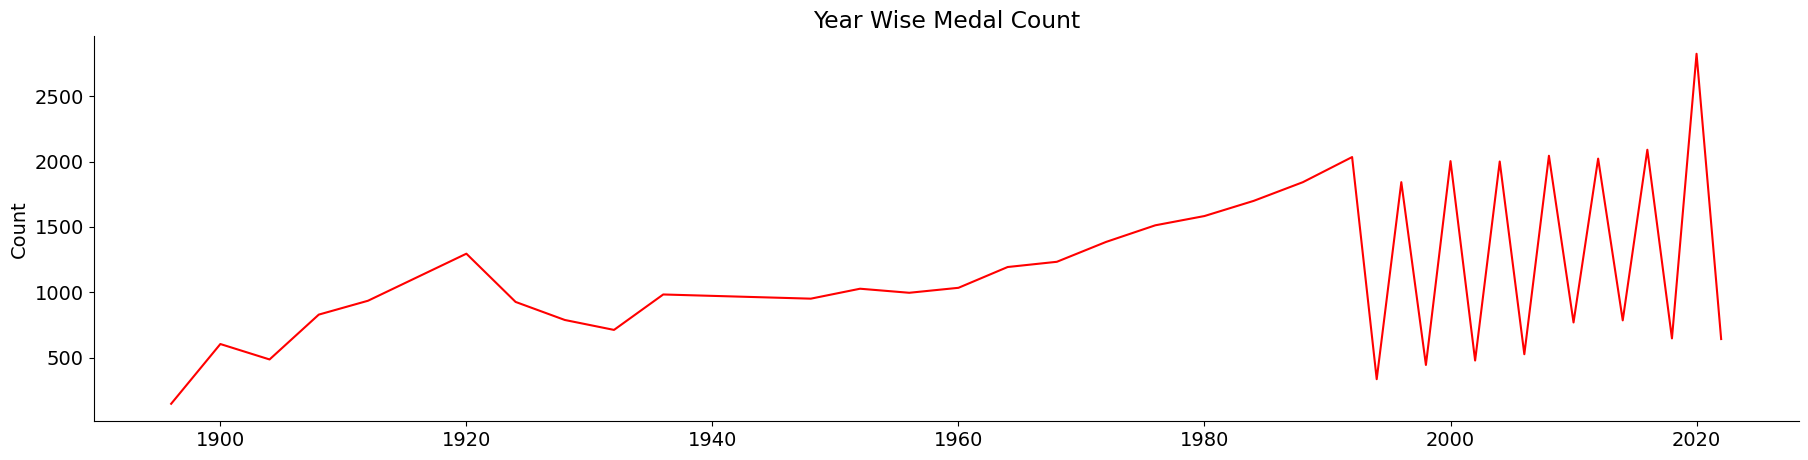

In [32]:
query = '''
select year, count(year) as Medals from dataset 
    where Medal is not null and year is not null
group by 1
order by 1
'''

temp = pd.read_sql(query, conn)
plt.plot(temp['year'], temp['Medals'], color='red')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Year Wise Medal Count')
plt.ylabel('Count')
plt.show()

**What is the distribution of medals distributed?**

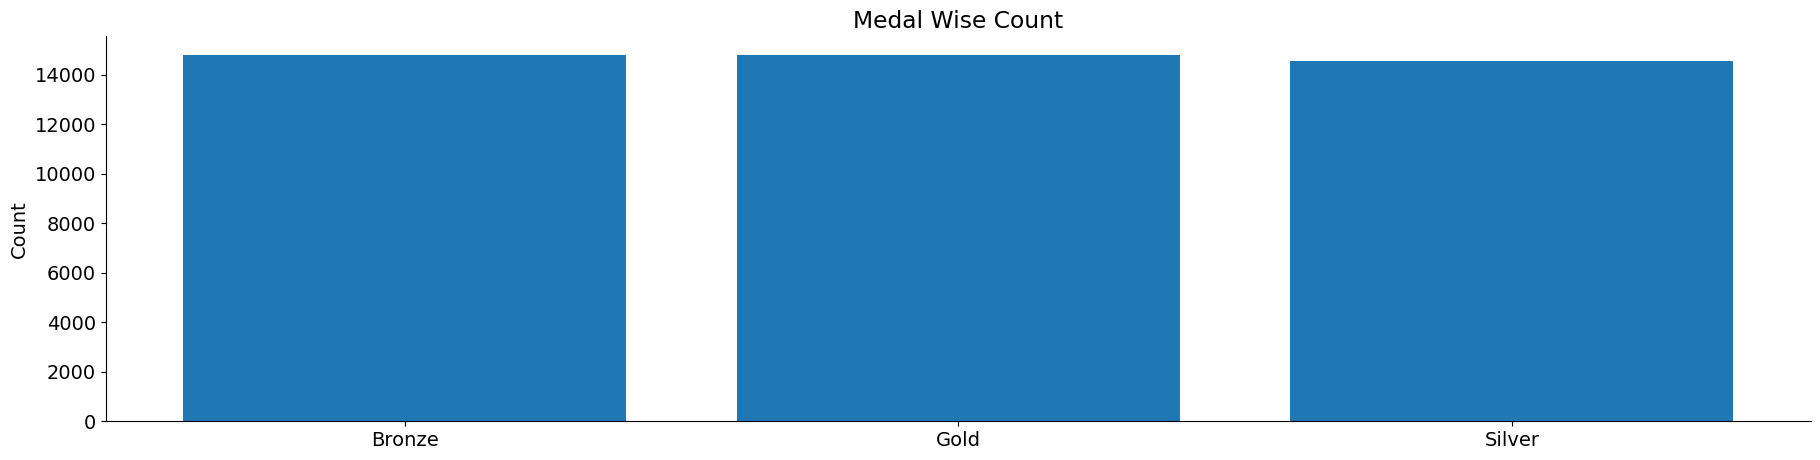

In [33]:
query = '''
select Medal, count(*) as Cnt from dataset 
        where Medal is not null 
group by Medal 
order by 2 desc
'''
temp = pd.read_sql(query, conn)
plt.bar(temp['Medal'], temp['Cnt'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Medal Wise Count')
plt.ylabel('Count')
plt.show()

**Plot the each medal type wins distribution over the years**

In [34]:
query = '''
select year,
    sum(case when Medal = 'Gold' then 1 else 0 end) as Gold,
    sum(case when Medal = 'Silver' then 1 else 0 end) as Silver,
    sum(case when Medal = 'Bronze' then 1 else 0 end) as Bronze,

    count(*) as Total

 from dataset 
    where Medal is not null and year is not null
group by 1
order by 1
'''

temp = pd.read_sql(query, conn)
temp['year']= temp['year'].astype(int)
temp.head()

,year,Gold,Silver,Bronze,Total
0,1896,62,46,39,147
1,1900,201,227,176,604
2,1904,173,163,150,486
3,1908,294,281,254,829
4,1912,319,316,300,935


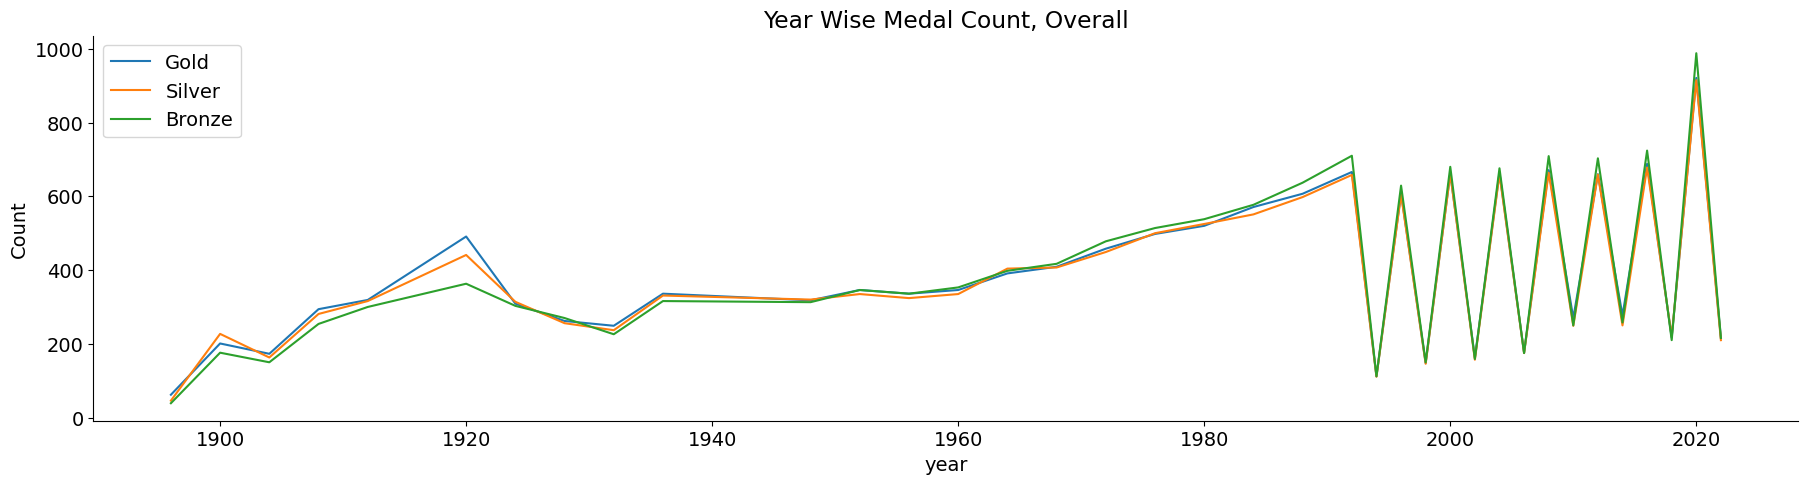

In [35]:
temp.set_index('year')[['Gold', 'Silver', 'Bronze']].plot()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Year Wise Medal Count, Overall')
plt.ylabel('Count')
plt.show()

**Which country grabs the most medals**

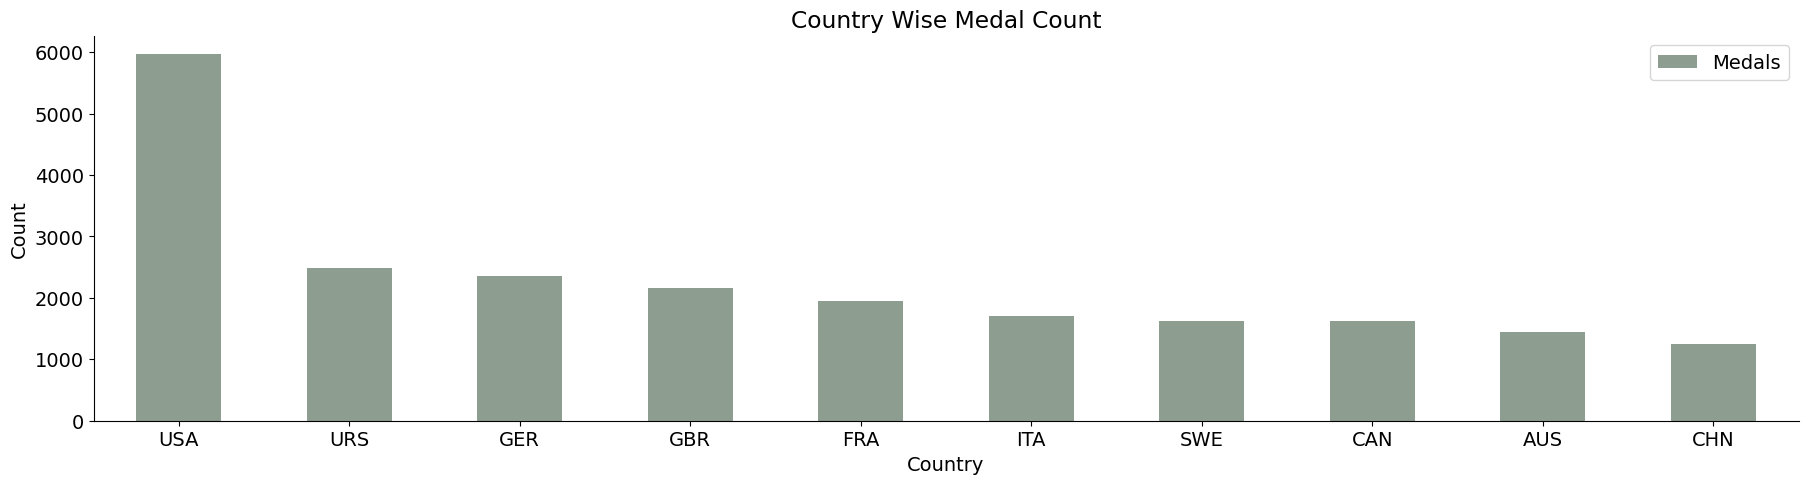

In [36]:
query = '''
select NOC_x as Country, count(*) as Medals
    from dataset
    where Medal is not null  and year is not null
group by 1 
order by 2 desc
'''

temp = pd.read_sql(query, conn).head(10)
temp.set_index('Country').plot(kind='bar', color='#8D9D90')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Country Wise Medal Count')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Which is the discpline where most medals have been won overall**?

In [37]:
query = '''
select Discipline, count(*) as Medals
    from dataset
    where Discipline is not null and Medal is not null 
group by 1 
order by 2 desc
'''

pd.read_sql(query, conn).head(10)

,Discipline,Medals
0,Athletics,4256
1,Swimming (Aquatics),3289
2,Rowing,3085
3,Artistic Gymnastics (Gymnastics),2341
4,Ice Hockey (Ice Hockey),1905
5,Fencing,1856
6,Football (Football),1696
7,Hockey,1633
8,Wrestling,1362
9,Shooting,1286


**Plot a chart for Medals won in Athletics discipline over the years**

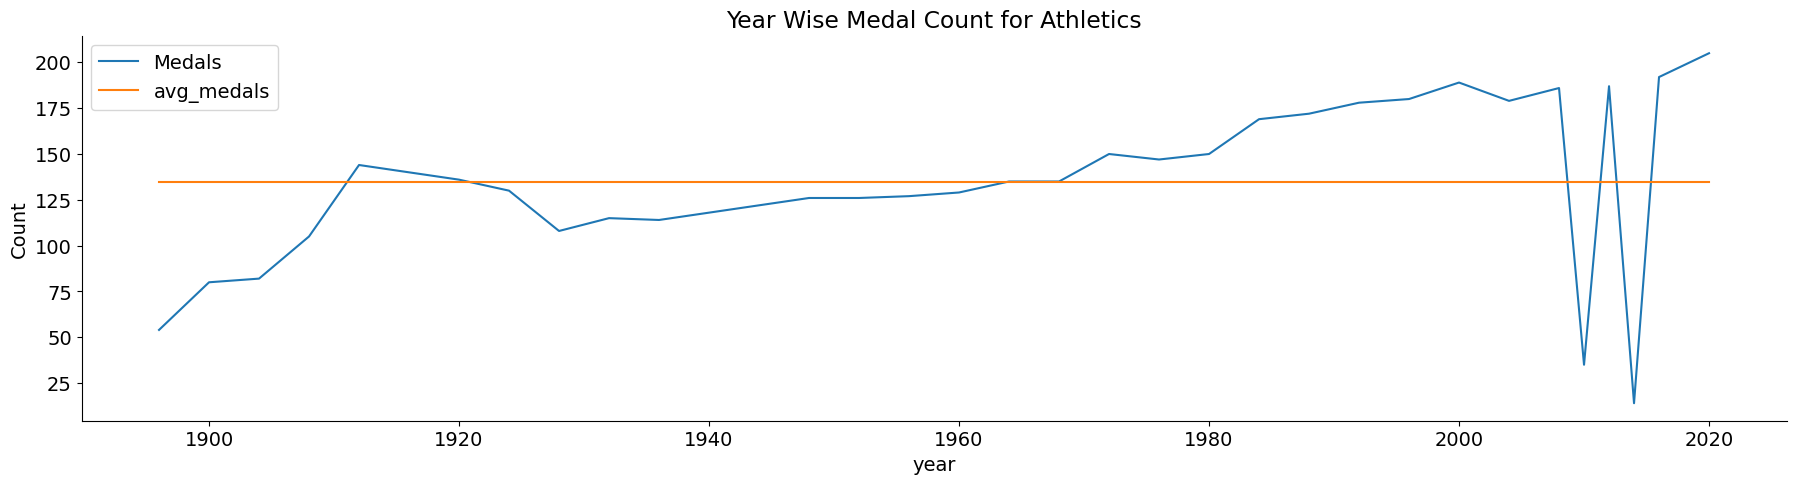

In [38]:
query = '''
select year, count(*) as Medals
    from dataset
    where Discipline = 'Athletics' and Medal is not null  and year is not null
group by 1 
order by 1 asc
'''

temp = pd.read_sql(query, conn)
temp['year']= temp['year'].astype(int)
temp['avg_medals'] =  temp['Medals'].mean()
temp.set_index('year').plot()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Year Wise Medal Count for Athletics')
plt.ylabel('Count')
plt.show()

**Which country in Athletics discipline bags the most medals?**

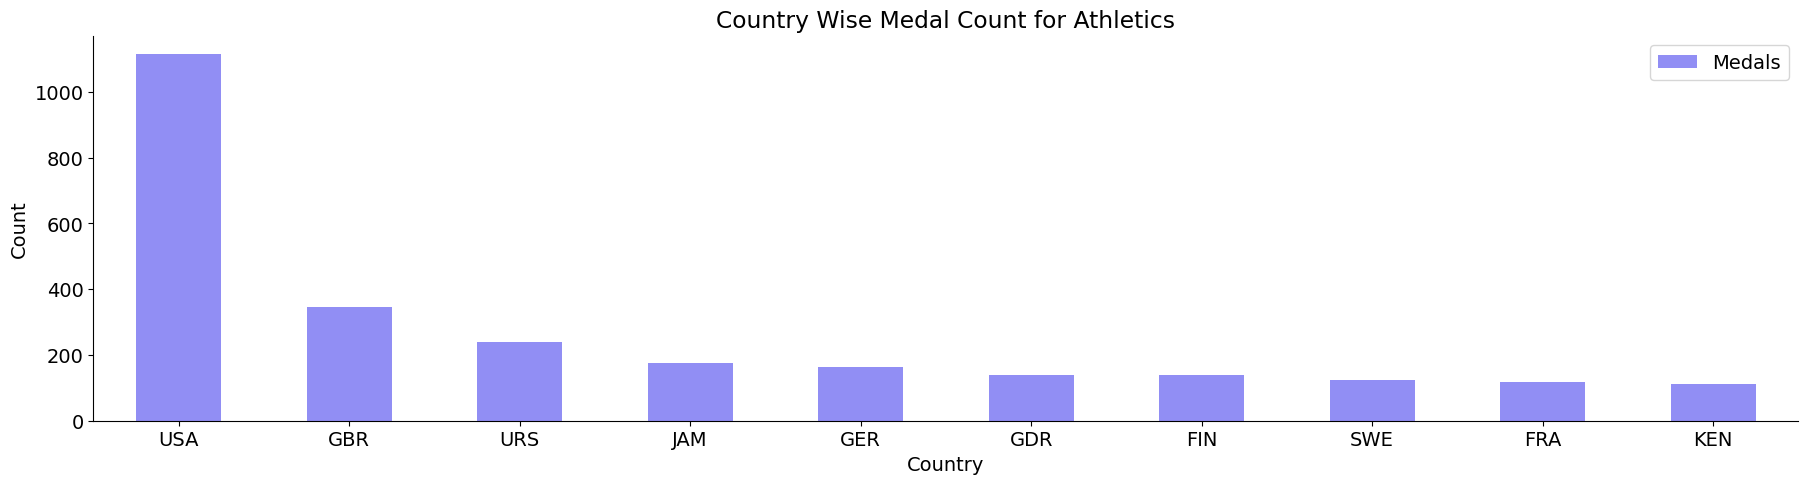

In [39]:
query = '''
select NOC_x as Country, count(*) as Medals
    from dataset
    where Discipline = 'Athletics' and Medal is not null  and year is not null
group by 1 
order by 2 desc
'''

temp = pd.read_sql(query, conn).head(10)
temp.set_index('Country').plot(kind='bar', color='#918EF4')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Country Wise Medal Count for Athletics')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**What medal is being bagged the most by the USA Athletes?**

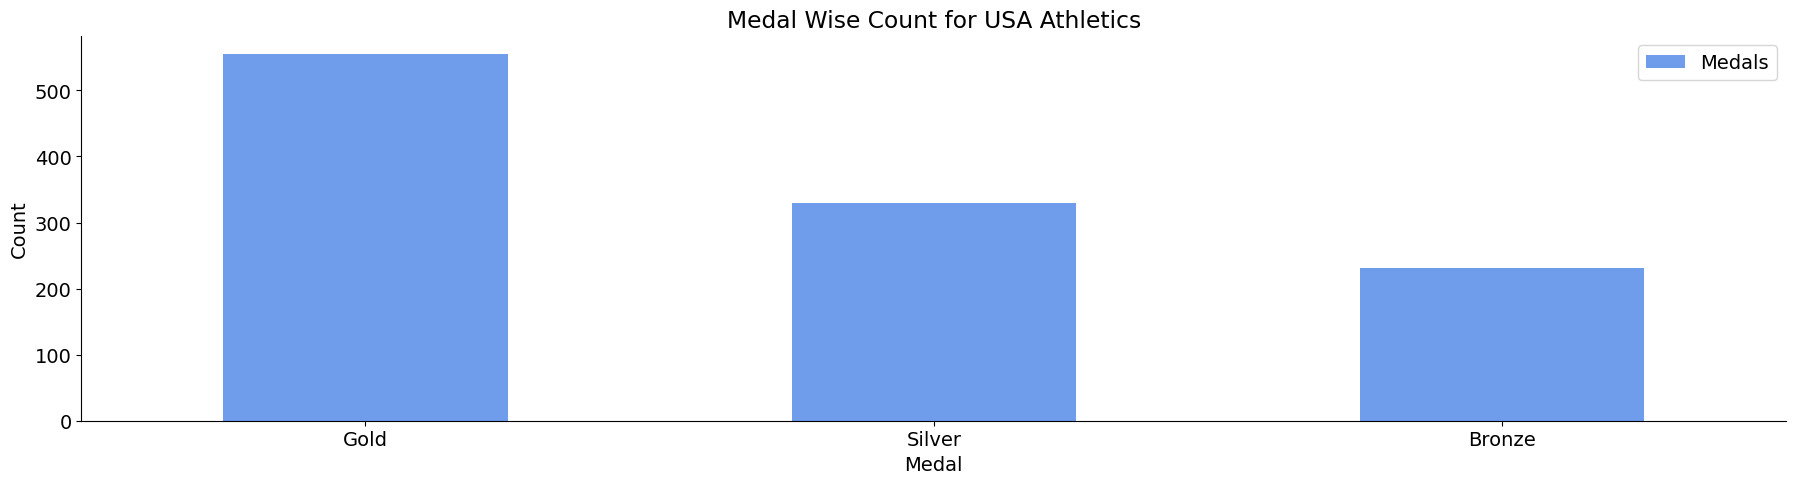

In [40]:
query = '''
select Medal, count(*) as Medals
    from dataset
    where Discipline = 'Athletics' and NOC_x = 'USA' and Medal is not null  and year is not null
group by 1 
order by 2 desc
'''

temp = pd.read_sql(query, conn)
temp.set_index('Medal').plot(kind='bar', color= '#6F9CEB')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Medal Wise Count for USA Athletics')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

**Which country bags the most gold?**

In [41]:
query = '''
select NOC_x as Country,
    sum(case when Medal = 'Gold' then 1 else 0 end) as Gold,
    sum(case when Medal = 'Silver' then 1 else 0 end) as Silver,
    sum(case when Medal = 'Bronze' then 1 else 0 end) as Bronze,
    count(*) as Total

 from dataset 
    where Medal is not null and year is not null
group by 1
order by Total desc
'''

temp = pd.read_sql(query, conn)
temp[temp['Gold']==temp['Gold'].max()]

,Country,Gold,Silver,Bronze,Total
0,USA,2705,1800,1466,5971


**Which city in US does athletes that got a medal come from the most?**

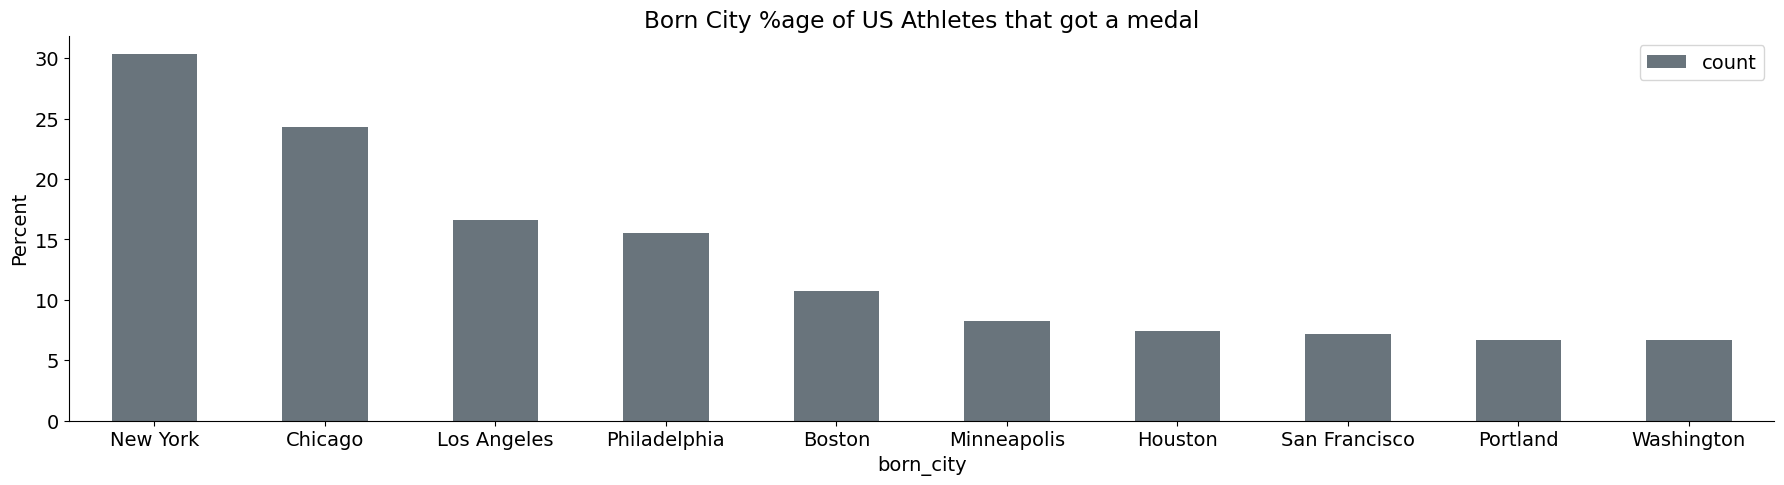

In [42]:
round(final[(final['NOC_x']=='USA') & (final['Medal']!=None)]['born_city'].value_counts()/2515*100,2).head(10).to_frame().plot(kind='bar', 
                                                                                                                        color='#69747C')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Born City %age of US Athletes that got a medal')
plt.xticks(rotation=0)
plt.ylabel('Percent')
plt.show()

**Find out the No of Years a country won a medal at the Olympics**

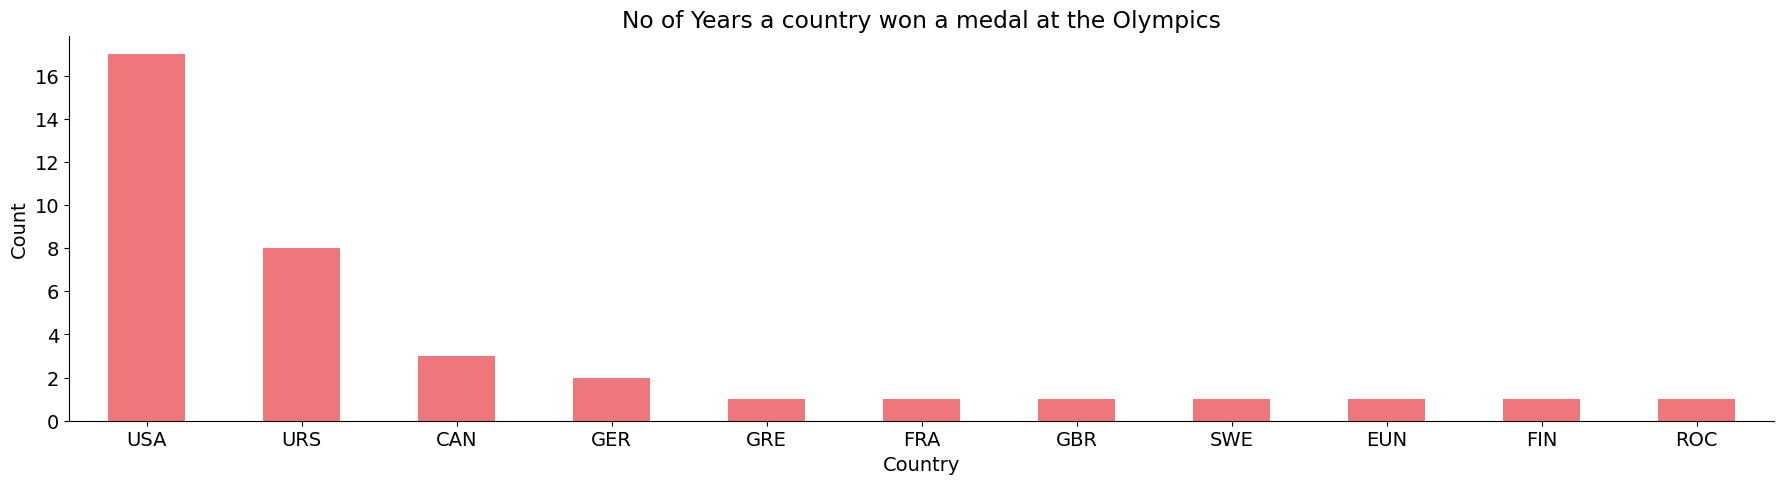

In [43]:
query = '''
WITH cte AS (
    SELECT 
        year, 
        NOC_x, 
        COUNT(NOC_x) AS Medal
    FROM dataset 
    WHERE Medal IS NOT NULL AND year IS NOT NULL
    GROUP BY year, NOC_x),

pct_cte AS (
    SELECT 
        year, 
        NOC_x, 
        Medal, 
        ROUND(Medal * 100.0 / SUM(Medal) OVER(PARTITION BY year ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING), 2) AS PctMedalWon
    FROM cte),

interim_cte AS (
    SELECT 
        year, 
        NOC_x, 
        Medal, 
        PctMedalWon, 
        MAX(PctMedalWon) OVER(PARTITION BY year ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS MaxMedals
    FROM pct_cte)

SELECT 
    year, 
    NOC_x AS Country, 
    Medal
FROM 
    interim_cte 
WHERE PctMedalWon = MaxMedals 
ORDER BY year;
'''

temp = pd.read_sql(query, conn)
temp['year'] =  temp['year'].astype(int)
temp['Country'].value_counts().plot(kind='bar', color='#EF767A')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('No of Years a country won a medal at the Olympics')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [44]:
all_countries = final['NOC_x'].unique().tolist()
countries = temp['Country'].unique().tolist()
no_medals = [i for i in all_countries if i not in countries]
print(f'There are {len(no_medals)} countries that have not gotten a medal at the olympics yet and some of those are:-', no_medals[:5])


There are 220 countries that have not gotten a medal at the olympics yet and some of those are:- ['FRG', 'GHA', 'GUA', 'HAI', 'HKG']


**INSIGHTS**

1. **Top Medal-Winning Country:** The United States athletes secured the highest number of medals overall, dominating both the total medal count and the number of gold medals won.

2. **Gold Medal Dominance:** The analysis highlighted that the United States not only led in total medals but also had a significant lead in gold medals, reflecting their dominance across multiple Olympic events.

3. **Medal Distribution Across Countries:** Other countries, such as Russia and China, were also identified as top performers, consistently winning a large share of the medals, particularly in specific sports or events.

4. **Emerging Medalists:** Some countries showed improvement over the years, with nations like Japan and Great Britain increasing their medal counts in recent Olympic Games.

5. **Countries Without Medals:** The analysis identified a number of countries (220 to be specific) that have never won an Olympic medal, emphasizing the disparity in athletic success across different nations.

## Conclusion

In this analysis, we explored Olympic data from 1896 to 2022 to gain insights into the distribution of medals among participating countries. We identified top-performing nations, such as the United States, which led in both total medals and gold medals. We also highlighted countries that have yet to win any medals, showcasing the disparities in Olympic success across different regions.

The analysis provides a foundation for further research, such as analyzing the factors contributing to a country's success or challenges in the Olympics. Future steps could involve deeper exploration of the impact of socio-economic factors, investment in sports, and athlete development programs on a nation's performance. Additionally, examining trends in specific sports or events could offer more granular insights into the dynamics of Olympic achievements.

